# MS Dhoni's Data

In [1]:
#This is for MS Dhoni's data
# Importing Libraries
import pandas as pd
import numpy as np

In [2]:
# Importing the dataset
cricket_data= pd.read_csv("all_matches.csv")

C:\Users\gogat\AppData\Local\Temp\ipykernel_38340\4006547997.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  cricket_data= pd.read_csv("all_matches.csv")


In [3]:
cricket_data.tail(5)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
200659,1254086,2021,2021-05-02,"Narendra Modi Stadium, Ahmedabad",2,17.2,Delhi Capitals,Punjab Kings,SO Hetmyer,S Dhawan,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200660,1254086,2021,2021-05-02,"Narendra Modi Stadium, Ahmedabad",2,17.3,Delhi Capitals,Punjab Kings,SO Hetmyer,S Dhawan,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200661,1254086,2021,2021-05-02,"Narendra Modi Stadium, Ahmedabad",2,17.4,Delhi Capitals,Punjab Kings,SO Hetmyer,S Dhawan,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200662,1254086,2021,2021-05-02,"Narendra Modi Stadium, Ahmedabad",2,17.5,Delhi Capitals,Punjab Kings,SO Hetmyer,S Dhawan,...,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200663,1254086,2021,2021-05-02,"Narendra Modi Stadium, Ahmedabad",2,17.6,Delhi Capitals,Punjab Kings,SO Hetmyer,S Dhawan,...,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
cricket_data.columns

Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type',
       'other_player_dismissed'],
      dtype='object')

In [5]:
#Filtering rows where Virat Kohli is the striker
dhoni_batting_data = cricket_data[cricket_data['striker'] == 'MS Dhoni']

#Calculating the number of balls faced and runs scored by Rohith
dhoni_batting_stats = dhoni_batting_data.groupby(['start_date', 'match_id', 'venue', 'innings','bowling_team']).agg({
    'ball': 'count',
    'runs_off_bat': 'sum',
}).reset_index()

#Calculating boundaries (4s and 6s), half-centuries, and centuries
dhoni_batting_data['boundary_count'] = dhoni_batting_data['runs_off_bat'].apply(lambda x: 1 if x == 4 else 0)
dhoni_batting_data['sixer_count'] = dhoni_batting_data['runs_off_bat'].apply(lambda x: 1 if x == 6 else 0)
boundaries_sixes_data = dhoni_batting_data.groupby(['start_date', 'match_id', 'venue', 'innings','bowling_team']).agg({
    'boundary_count': 'sum',
    'sixer_count': 'sum'
}).reset_index()

dhoni_batting_stats = dhoni_batting_stats.merge(boundaries_sixes_data, on=['start_date', 'match_id', 'venue', 'innings','bowling_team'], how='left')

#Calculating half-centuries and centuries
dhoni_batting_stats['half_century_count'] = (dhoni_batting_stats['runs_off_bat'] >= 50).astype(int)
dhoni_batting_stats['century_count'] = (dhoni_batting_stats['runs_off_bat'] >= 100).astype(int)

#Calculating the strike rate
dhoni_batting_stats['strike_rate'] = (dhoni_batting_stats['runs_off_bat'] / dhoni_batting_stats['ball']) * 100

#Computing the Fantasy Point for Rohith
def calculate_fantasy_points(row):
    points = 0
    
    #Points for runs
    points += row['runs_off_bat']
    
    #Points for boundaries and sixers
    points += row['boundary_count']  # 1 point for each boundary
    points += 2 * row['sixer_count']  # 2 points for each sixer
    
    #Bonus points for half-century and century
    if row['runs_off_bat'] >= 50:
        points += 8
    if row['runs_off_bat'] >= 100:
        points += 16
    
    #Deductions for low strike rate (only if batsman has faced at least 10 balls)
    if row['ball'] >= 10:
        if 60 <= row['strike_rate'] <= 70:
            points -= 2
        elif row['strike_rate'] < 60:
            points -= 4
    
    return points

#Calculating fantasy points for each row in the dataset
dhoni_batting_stats['fantasy_points'] = dhoni_batting_stats.apply(calculate_fantasy_points, axis=1)

#Displaying the dataset with the new 'fantasy_points' column
dhoni_batting_stats

C:\Users\gogat\AppData\Local\Temp\ipykernel_38340\140021648.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dhoni_batting_data['boundary_count'] = dhoni_batting_data['runs_off_bat'].apply(lambda x: 1 if x == 4 else 0)
C:\Users\gogat\AppData\Local\Temp\ipykernel_38340\140021648.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dhoni_batting_data['sixer_count'] = dhoni_batting_data['runs_off_bat'].apply(lambda x: 1 if x == 6 else 0)


,start_date,match_id,venue,innings,bowling_team,ball,runs_off_bat,boundary_count,sixer_count,half_century_count,century_count,strike_rate,fantasy_points
0,2008-04-19,335983,"Punjab Cricket Association Stadium, Mohali",1,Kings XI Punjab,3,2,0,0,0,0,66.666667,2
1,2008-04-23,335989,"MA Chidambaram Stadium, Chepauk",1,Mumbai Indians,17,30,4,1,0,0,176.470588,36
2,2008-04-26,335993,"MA Chidambaram Stadium, Chepauk",2,Kolkata Knight Riders,27,43,3,2,0,0,159.259259,50
3,2008-04-28,335996,M Chinnaswamy Stadium,1,Royal Challengers Bangalore,31,65,9,3,1,0,209.677419,88
4,2008-05-02,336001,"MA Chidambaram Stadium, Chepauk",1,Delhi Daredevils,28,32,2,1,0,0,114.285714,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,2020-10-29,1216536,Dubai International Cricket Stadium,2,Kolkata Knight Riders,4,1,0,0,0,0,25.000000,1
182,2021-04-10,1254059,"Wankhede Stadium, Mumbai",1,Delhi Capitals,2,0,0,0,0,0,0.000000,0
183,2021-04-19,1254069,"Wankhede Stadium, Mumbai",1,Rajasthan Royals,17,18,2,0,0,0,105.882353,20
184,2021-04-21,1254072,"Wankhede Stadium, Mumbai",1,Kolkata Knight Riders,10,17,2,1,0,0,170.000000,21


In [6]:
#Getting Descriptive Stats for the Dataset 
dhoni_batting_stats.describe()

,match_id,innings,ball,runs_off_bat,boundary_count,sixer_count,half_century_count,century_count,strike_rate,fantasy_points
count,1.860000e+02,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.0,186.000000,186.000000
mean,7.727346e+05,1.419355,18.951613,25.102151,1.704301,1.166667,0.123656,0.0,122.852726,29.935484
std,3.077597e+05,0.494785,11.305240,18.787152,1.725385,1.470123,0.330077,0.0,55.848507,24.868652
min,3.359830e+05,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,5.012550e+05,1.000000,10.250000,10.000000,0.000000,0.000000,0.000000,0.0,88.888889,10.000000
50%,7.339990e+05,1.000000,17.000000,22.500000,1.000000,1.000000,0.000000,0.0,124.404762,25.500000
75%,1.082633e+06,2.000000,27.000000,33.750000,2.000000,2.000000,0.000000,0.0,160.648148,38.000000
max,1.254076e+06,2.000000,49.000000,84.000000,9.000000,7.000000,1.000000,0.0,281.250000,111.000000


In [7]:
# Saving the Data as CSV file
dhoni_batting_stats.to_csv('dhoni_batting_stats.csv', index=False)

In [8]:
dhoni_batting_stats.columns

Index(['start_date', 'match_id', 'venue', 'innings', 'bowling_team', 'ball',
       'runs_off_bat', 'boundary_count', 'sixer_count', 'half_century_count',
       'century_count', 'strike_rate', 'fantasy_points'],
      dtype='object')

In [9]:
#Checking the Missing Value information
dhoni_batting_stats.isnull().sum()

start_date            0
match_id              0
venue                 0
innings               0
bowling_team          0
ball                  0
runs_off_bat          0
boundary_count        0
sixer_count           0
half_century_count    0
century_count         0
strike_rate           0
fantasy_points        0
dtype: int64

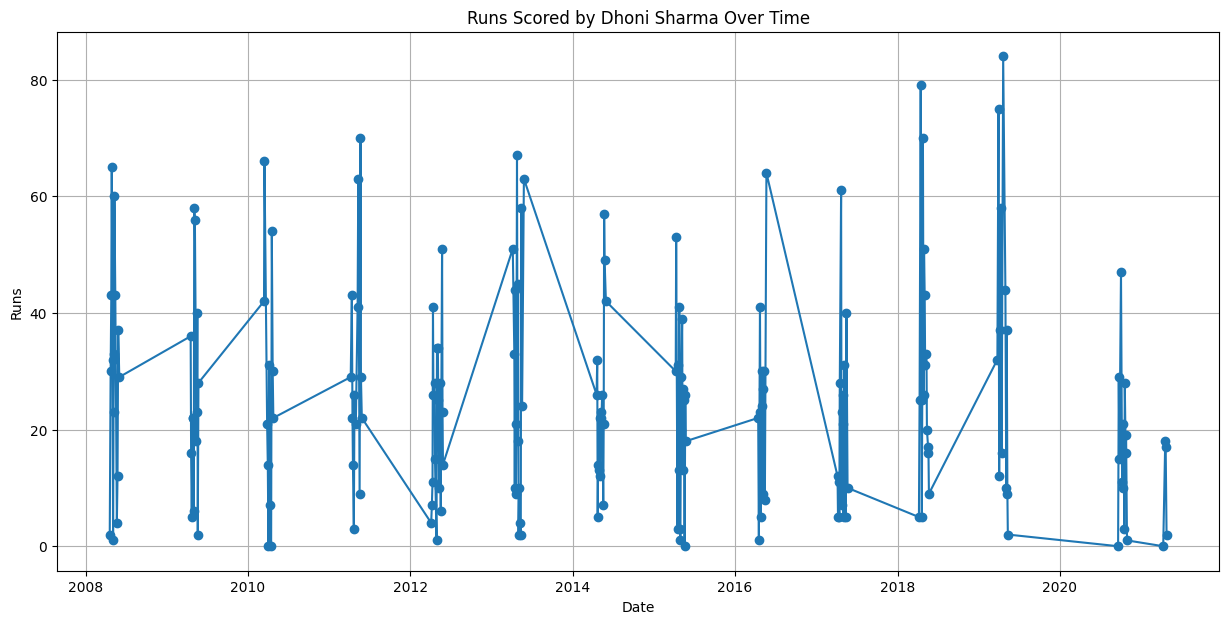

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

#Converting 'start_date' column to datetime if it's not already in datetime format
dhoni_batting_stats['start_date'] = pd.to_datetime(dhoni_batting_stats['start_date'])

#Plotting the data
plt.figure(figsize=(15, 7))
plt.plot(dhoni_batting_stats['start_date'], dhoni_batting_stats['runs_off_bat'], marker='o', linestyle='-')
plt.title('Runs Scored by Dhoni Sharma Over Time')
plt.xlabel('Date')
plt.ylabel('Runs')
plt.grid(True)
plt.show()

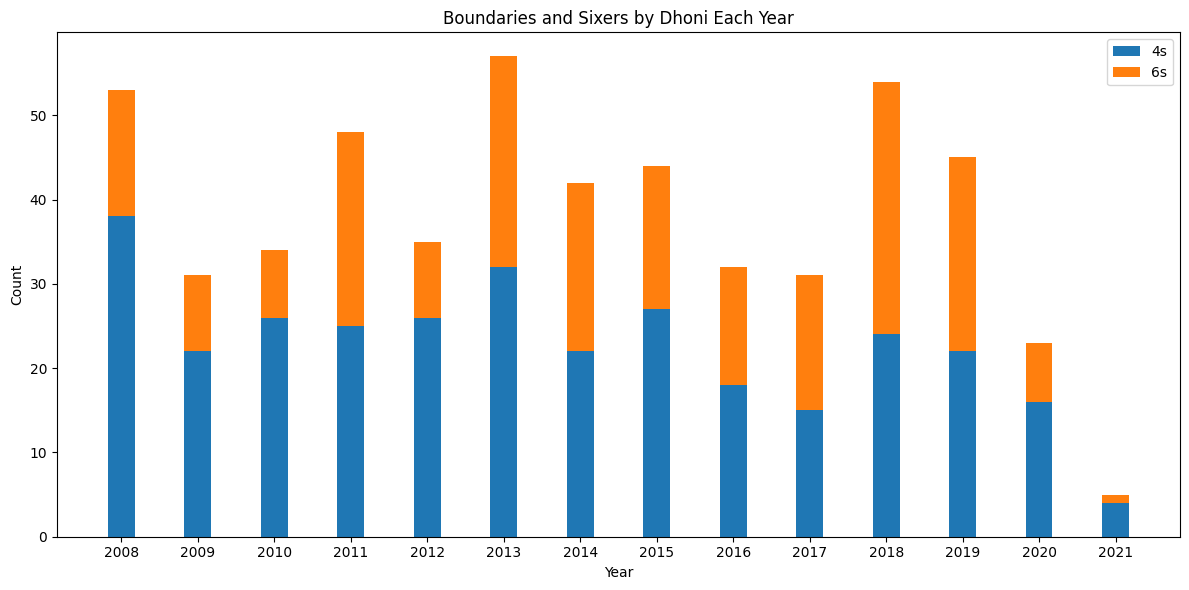

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

#converting it to datetime
dhoni_batting_stats['start_date'] = pd.to_datetime(dhoni_batting_stats['start_date'])

#Extracting the year from the 'start_date' column
dhoni_batting_stats['year'] = dhoni_batting_stats['start_date'].dt.year

#Grouping data by year and calculating the total boundaries and sixes for each year
yearly_stats = dhoni_batting_stats.groupby('year').agg({'boundary_count': 'sum', 'sixer_count': 'sum'}).reset_index()

#Plotting the data
plt.figure(figsize=(12, 6))
bar_width = 0.35
plt.bar(yearly_stats['year'], yearly_stats['boundary_count'], bar_width, label='4s')
plt.bar(yearly_stats['year'], yearly_stats['sixer_count'], bar_width, bottom=yearly_stats['boundary_count'], label='6s')

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Boundaries and Sixers by Dhoni Each Year')
plt.xticks(yearly_stats['year']) 
plt.legend()
plt.tight_layout()
plt.show()

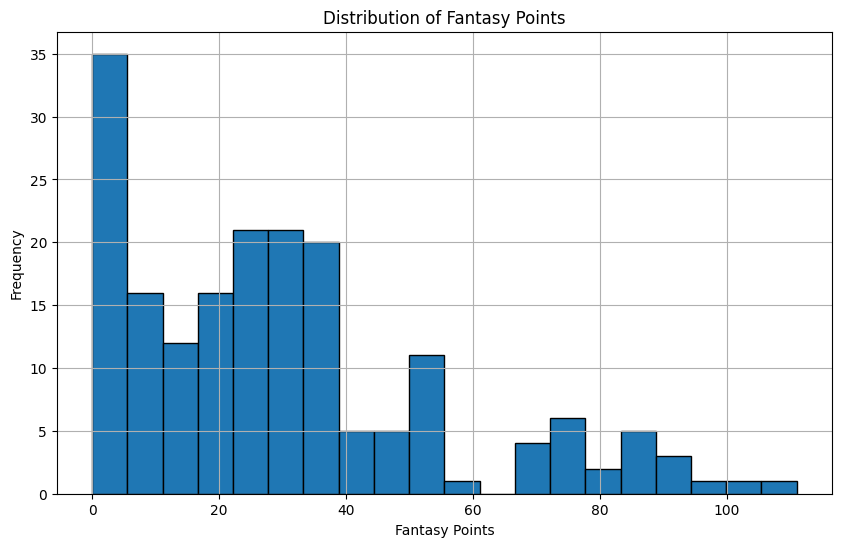

In [12]:
plt.figure(figsize=(10, 6))
plt.hist(dhoni_batting_stats['fantasy_points'], bins=20, edgecolor='black')
plt.title('Distribution of Fantasy Points')
plt.xlabel('Fantasy Points')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [13]:
#importing the libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [14]:
#disaplaying the unique venues
unique_venues = dhoni_batting_stats['venue'].unique()
unique_venues

array(['Punjab Cricket Association Stadium, Mohali',
       'MA Chidambaram Stadium, Chepauk', 'M Chinnaswamy Stadium',
       'Sawai Mansingh Stadium', 'Feroz Shah Kotla', 'Wankhede Stadium',
       'Rajiv Gandhi International Stadium, Uppal',
       'Dr DY Patil Sports Academy', 'Newlands', "St George's Park",
       'Kingsmead', 'SuperSport Park', 'New Wanderers Stadium',
       'Buffalo Park', 'Eden Gardens', 'Sardar Patel Stadium, Motera',
       'Vidarbha Cricket Association Stadium, Jamtha',
       'Himachal Pradesh Cricket Association Stadium', 'Nehru Stadium',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
       'Subrata Roy Sahara Stadium', 'Sheikh Zayed Stadium',
       'Dubai International Cricket Stadium', 'Sharjah Cricket Stadium',
       'JSCA International Stadium Complex', 'Barabati Stadium',
       'Shaheed Veer Narayan Singh International Stadium',
       'Saurashtra Cricket Association Stadium',
       'Punjab Cricket Association IS Bindra Stadium, M

In [15]:
#Transforming the venue column
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
dhoni_batting_stats['venue_encoded'] = label_encoder.fit_transform(dhoni_batting_stats['venue'])
dhoni_batting_stats['venue_encoded']

0      22
1      15
2      15
3      12
4      15
       ..
181     5
182    36
183    36
184    36
185    36
Name: venue_encoded, Length: 186, dtype: int32

In [16]:
dhoni_batting_stats

,start_date,match_id,venue,innings,bowling_team,ball,runs_off_bat,boundary_count,sixer_count,half_century_count,century_count,strike_rate,fantasy_points,year,venue_encoded
0,2008-04-19,335983,"Punjab Cricket Association Stadium, Mohali",1,Kings XI Punjab,3,2,0,0,0,0,66.666667,2,2008,22
1,2008-04-23,335989,"MA Chidambaram Stadium, Chepauk",1,Mumbai Indians,17,30,4,1,0,0,176.470588,36,2008,15
2,2008-04-26,335993,"MA Chidambaram Stadium, Chepauk",2,Kolkata Knight Riders,27,43,3,2,0,0,159.259259,50,2008,15
3,2008-04-28,335996,M Chinnaswamy Stadium,1,Royal Challengers Bangalore,31,65,9,3,1,0,209.677419,88,2008,12
4,2008-05-02,336001,"MA Chidambaram Stadium, Chepauk",1,Delhi Daredevils,28,32,2,1,0,0,114.285714,36,2008,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,2020-10-29,1216536,Dubai International Cricket Stadium,2,Kolkata Knight Riders,4,1,0,0,0,0,25.000000,1,2020,5
182,2021-04-10,1254059,"Wankhede Stadium, Mumbai",1,Delhi Capitals,2,0,0,0,0,0,0.000000,0,2021,36
183,2021-04-19,1254069,"Wankhede Stadium, Mumbai",1,Rajasthan Royals,17,18,2,0,0,0,105.882353,20,2021,36
184,2021-04-21,1254072,"Wankhede Stadium, Mumbai",1,Kolkata Knight Riders,10,17,2,1,0,0,170.000000,21,2021,36


In [17]:
dhoni_batting_stats

,start_date,match_id,venue,innings,bowling_team,ball,runs_off_bat,boundary_count,sixer_count,half_century_count,century_count,strike_rate,fantasy_points,year,venue_encoded
0,2008-04-19,335983,"Punjab Cricket Association Stadium, Mohali",1,Kings XI Punjab,3,2,0,0,0,0,66.666667,2,2008,22
1,2008-04-23,335989,"MA Chidambaram Stadium, Chepauk",1,Mumbai Indians,17,30,4,1,0,0,176.470588,36,2008,15
2,2008-04-26,335993,"MA Chidambaram Stadium, Chepauk",2,Kolkata Knight Riders,27,43,3,2,0,0,159.259259,50,2008,15
3,2008-04-28,335996,M Chinnaswamy Stadium,1,Royal Challengers Bangalore,31,65,9,3,1,0,209.677419,88,2008,12
4,2008-05-02,336001,"MA Chidambaram Stadium, Chepauk",1,Delhi Daredevils,28,32,2,1,0,0,114.285714,36,2008,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,2020-10-29,1216536,Dubai International Cricket Stadium,2,Kolkata Knight Riders,4,1,0,0,0,0,25.000000,1,2020,5
182,2021-04-10,1254059,"Wankhede Stadium, Mumbai",1,Delhi Capitals,2,0,0,0,0,0,0.000000,0,2021,36
183,2021-04-19,1254069,"Wankhede Stadium, Mumbai",1,Rajasthan Royals,17,18,2,0,0,0,105.882353,20,2021,36
184,2021-04-21,1254072,"Wankhede Stadium, Mumbai",1,Kolkata Knight Riders,10,17,2,1,0,0,170.000000,21,2021,36


In [18]:
#Transforming the bowling team column
label_encoder = LabelEncoder()
dhoni_batting_stats['bowling_team'] = label_encoder.fit_transform(dhoni_batting_stats['bowling_team'])
unique_venues = dhoni_batting_stats['bowling_team'].unique()
unique_venues

array([ 4,  7,  6, 10,  2,  9,  0,  5,  8, 11,  3,  1])

In [19]:
dhoni_batting_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_date          186 non-null    datetime64[ns]
 1   match_id            186 non-null    int64         
 2   venue               186 non-null    object        
 3   innings             186 non-null    int64         
 4   bowling_team        186 non-null    int32         
 5   ball                186 non-null    int64         
 6   runs_off_bat        186 non-null    int64         
 7   boundary_count      186 non-null    int64         
 8   sixer_count         186 non-null    int64         
 9   half_century_count  186 non-null    int32         
 10  century_count       186 non-null    int32         
 11  strike_rate         186 non-null    float64       
 12  fantasy_points      186 non-null    int64         
 13  year                186 non-null    int32         

In [20]:
# Batting prediction using additional Variables 
# Data Preparation
features = ['ball','runs_off_bat' ,'boundary_count', 'sixer_count', 'strike_rate','half_century_count', 'century_count', 'venue_encoded', 'innings','bowling_team']
X = dhoni_batting_stats[features]
y = dhoni_batting_stats['fantasy_points']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model
lr2 = LinearRegression()
lr2.fit(X_train, y_train)
y_pred_lr2 = lr2.predict(X_test)

# SVM with Linear Kernel
svm_linear2 = SVR(kernel='linear')
svm_linear2.fit(X_train, y_train)
y_pred_svm_linear2 = svm_linear2.predict(X_test)

# SVM with Polynomial Kernel
svm_poly2 = SVR(kernel='poly')
svm_poly2.fit(X_train, y_train)
y_pred_svm_poly2 = svm_poly2.predict(X_test)

# Evaluation
models = ['Linear Regression with additional variable', 'SVM Linear with Additional Variable', 'SVM Polynomial with Additional Variable']
predictions = [y_pred_lr2, y_pred_svm_linear2, y_pred_svm_poly2]

for i, model in enumerate(models):
    print(f"{model} Metrics:")
    print("MAE:", mean_absolute_error(y_test, predictions[i]))
    print("MSE:", mean_squared_error(y_test, predictions[i]))
    print("R2 Score:", r2_score(y_test, predictions[i]))
    print("-------------------------------")

Linear Regression with additional variable Metrics:
MAE: 0.4365107259696855
MSE: 0.44384748042133065
R2 Score: 0.9992196705849851
-------------------------------
SVM Linear with Additional Variable Metrics:
MAE: 0.22852804551030462
MSE: 0.484011472185107
R2 Score: 0.9991490581661245
-------------------------------
SVM Polynomial with Additional Variable Metrics:
MAE: 6.7694201459209795
MSE: 72.1468058582279
R2 Score: 0.873158512115225
-------------------------------


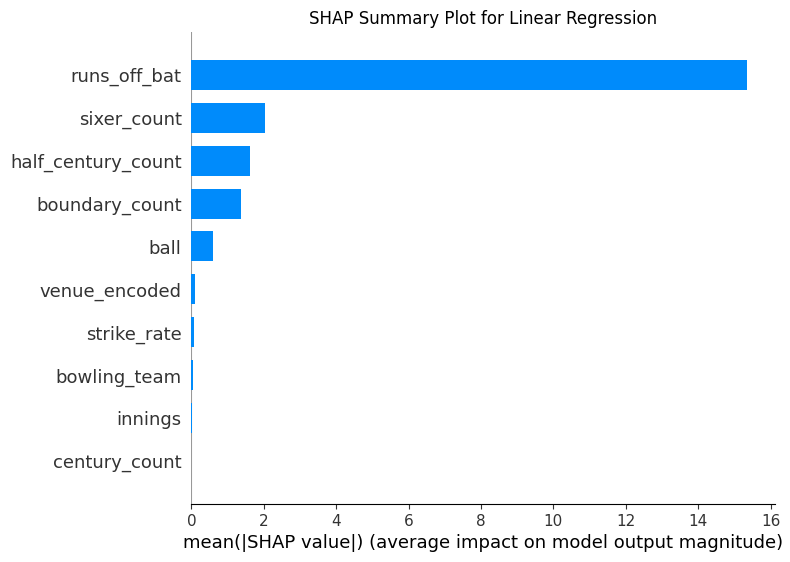

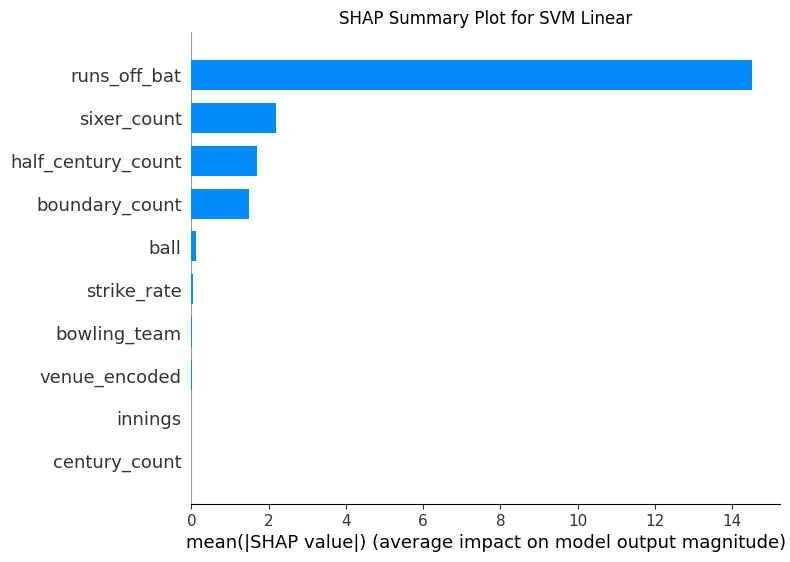

In [21]:
import shap

# List of models and corresponding names
models = [lr2, svm_linear2]
model_names = ['Linear Regression', 'SVM Linear']

# Initialize a SHAP explainer and calculate feature importance for each model
for i, model in enumerate(models):
    # Initialize a SHAP explainer for the model
    explainer = shap.Explainer(model, X_train)
    
    # Calculate SHAP values for the test data
    shap_values = explainer.shap_values(X_test)
    
    # Summary Plot of Feature Importance
    plt.figure(figsize=(8, 6))
    shap.summary_plot(shap_values, X_test, feature_names=features, plot_type='bar', show=False)
    plt.title(f"SHAP Summary Plot for {model_names[i]}")
    plt.show()

In [22]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

#Selecting relevant columns
features = ['runs_off_bat', 'ball', 'boundary_count', 'sixer_count', 'strike_rate', 'half_century_count', 'century_count','innings']
target = 'fantasy_points'

X = dhoni_batting_stats[features].values
y = dhoni_batting_stats[target].values

#Calculating the index for splitting the data
split_index = int(0.8 * len(y))  # 80% for training, 20% for testing

#Splitting data into train and test sets based on the index
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

#Creating empty lists to store sequences and targets with window size 10
x_windows_train = []
y_windows_train = []

#Creating rolling window sequences for training data with window size 10
for i in range(10, len(y_train)):
    x_train = X_train[i-10:i, :]  #Creating input sequences of length 10
    y_train_val = y_train[i]      #Corresponding target for the sequence
    x_windows_train.append(x_train)
    y_windows_train.append(y_train_val)

#Converting lists to numpy arrays for training data
x_windows_train = np.array(x_windows_train)
y_windows_train = np.array(y_windows_train)

#Reshaping input data to fit the LSTM input shape for training data
x_windows_train = x_windows_train.reshape((x_windows_train.shape[0], x_windows_train.shape[1], x_windows_train.shape[2]))

#Creating the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(x_windows_train.shape[1], x_windows_train.shape[2])))
model.add(Dense(1))  #Output layer with one neuron for regression
#Compiling the model
model.compile(optimizer='adam', loss='mse')

#Training the model
model.fit(x_windows_train, y_windows_train, epochs=50, batch_size=32, verbose=1)

#Evaluating the model on training data
train_predictions = model.predict(x_windows_train)
train_r_squared = r2_score(y_train[10:], train_predictions)
train_mae = mean_absolute_error(y_train[10:], train_predictions)
train_rmse = np.sqrt(mean_squared_error(y_train[10:], train_predictions))

print("Training Metrics:")
print(f"Mean Absolute Error: {train_mae}")
print(f"Root Mean Squared Error: {train_rmse}")

#Creating empty lists to store sequences for testing data with window size 10
x_windows_test = []

#Creating rolling window sequences for testing data with window size 10
for i in range(10, len(y_test)):
    x_test = X_test[i-10:i, :]  # Creating input sequences of length 10 for testing data
    x_windows_test.append(x_test)

#Converting list to numpy array for testing data
x_windows_test = np.array(x_windows_test)

#Reshaping input data to fit the LSTM input shape for testing data
x_windows_test = x_windows_test.reshape((x_windows_test.shape[0], x_windows_test.shape[1], x_windows_test.shape[2])) 

#Predictions on testing data
test_predictions = model.predict(x_windows_test)

#Evaluating the model on testing data
test_r_squared = r2_score(y_test[10:], test_predictions)
test_mae = mean_absolute_error(y_test[10:], test_predictions)
test_rmse = np.sqrt(mean_squared_error(y_test[10:], test_predictions))

print("\nTesting Metrics:")
print(f"Mean Absolute Error: {test_mae}")
print(f"Root Mean Squared Error: {test_rmse}")

Epoch 1/50
5/5 [==============================] - 4s 17ms/step - loss: 985.7152
Epoch 2/50
5/5 [==============================] - 0s 9ms/step - loss: 800.5945
Epoch 3/50
5/5 [==============================] - 0s 8ms/step - loss: 656.5457
Epoch 4/50
5/5 [==============================] - 0s 7ms/step - loss: 630.6069
Epoch 5/50
5/5 [==============================] - 0s 7ms/step - loss: 591.9883
Epoch 6/50
5/5 [==============================] - 0s 7ms/step - loss: 583.6403
Epoch 7/50
5/5 [==============================] - 0s 19ms/step - loss: 540.1290
Epoch 8/50
5/5 [==============================] - 0s 7ms/step - loss: 524.7611
Epoch 9/50
5/5 [==============================] - 0s 7ms/step - loss: 514.1259
Epoch 10/50
5/5 [==============================] - 0s 7ms/step - loss: 489.7092
Epoch 11/50
5/5 [==============================] - 0s 7ms/step - loss: 485.4425
Epoch 12/50
5/5 [==============================] - 0s 6ms/step - loss: 464.7867
Epoch 13/50
5/5 [==============================

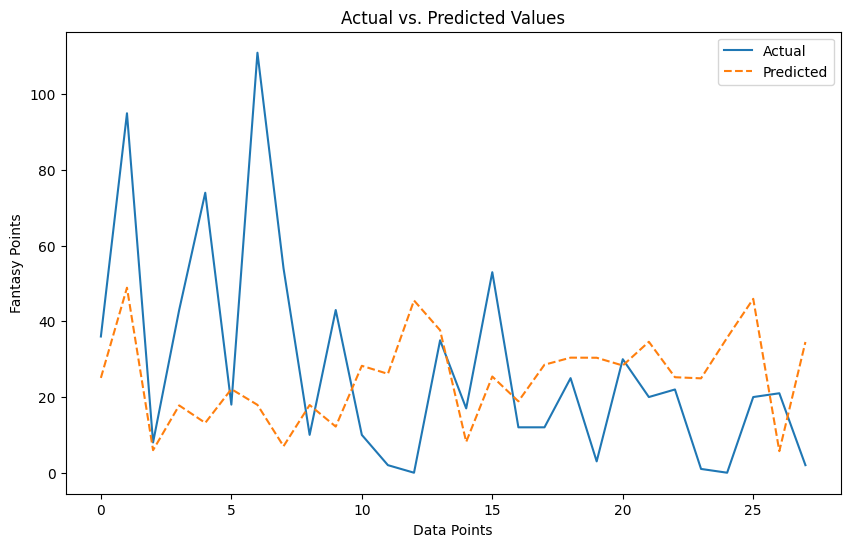

In [23]:
import matplotlib.pyplot as plt
#Plotting actual vs. predicted values for the test data
plt.figure(figsize=(10, 6))
plt.plot(y_test[10:], label='Actual')
plt.plot(test_predictions, label='Predicted', linestyle='--')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Data Points')
plt.ylabel('Fantasy Points')
plt.legend()
plt.show()

In [24]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Dropout

#Selecting relevant columns
features = ['runs_off_bat', 'ball', 'boundary_count', 'sixer_count', 'strike_rate', 'half_century_count', 'century_count','innings']
target = 'fantasy_points'

X = dhoni_batting_stats[features].values
y = dhoni_batting_stats[target].values

#Calculating the index for splitting the data
split_index = int(0.8 * len(y))  # 80% for training, 20% for testing

#Splitting data into train and test sets based on the index
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

#Creating empty lists to store sequences and targets with window size 10
x_windows_train = []
y_windows_train = []

#Creating rolling window sequences for training data with window size 10
for i in range(10, len(y_train)):
    x_train = X_train[i-10:i, :]  # Creating input sequences of length 10
    y_train_val = y_train[i]      # Corresponding target for the sequence
    x_windows_train.append(x_train)
    y_windows_train.append(y_train_val)

#Converting lists to numpy arrays for training data
x_windows_train = np.array(x_windows_train)
y_windows_train = np.array(y_windows_train)

#Reshaping input data to fit the LSTM input shape for training data
x_windows_train = x_windows_train.reshape((x_windows_train.shape[0], x_windows_train.shape[1], x_windows_train.shape[2]))

#Creating the Bidirectional LSTM model with Dropout regularization
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu', return_sequences=True), input_shape=(x_windows_train.shape[1], x_windows_train.shape[2])))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(50, activation='relu')))
model.add(Dropout(0.2))
model.add(Dense(1))  # Output layer with one neuron for regression

model.compile(optimizer='adam', loss='mse')  # Compiling the model

#Training the model
model.fit(x_windows_train, y_windows_train, epochs=50, batch_size=32, verbose=1)

#Evaluating the model on training data
train_predictions = model.predict(x_windows_train)
train_r_squared = r2_score(y_train[10:], train_predictions)
train_mae = mean_absolute_error(y_train[10:], train_predictions)
train_rmse = np.sqrt(mean_squared_error(y_train[10:], train_predictions))

print("Training Metrics:")
print(f"Mean Absolute Error: {train_mae}")
print(f"Root Mean Squared Error: {train_rmse}")

#Creating empty lists to store sequences for testing data with window size 10
x_windows_test = []

#Creating rolling window sequences for testing data with window size 10
for i in range(10, len(y_test)):
    x_test = X_test[i-10:i, :]  # Creating input sequences of length 10 for testing data
    x_windows_test.append(x_test)

#Convert list to numpy array for testing data
x_windows_test = np.array(x_windows_test)

#Reshaping input data to fit the LSTM input shape for testing data
x_windows_test = x_windows_test.reshape((x_windows_test.shape[0], x_windows_test.shape[1], x_windows_test.shape[2])) 

#Predictions on testing data
test_predictions = model.predict(x_windows_test)

#Evaluating the model on testing data
test_r_squared = r2_score(y_test[10:], test_predictions)
test_mae = mean_absolute_error(y_test[10:], test_predictions)
test_rmse = np.sqrt(mean_squared_error(y_test[10:], test_predictions))

print("\nTesting Metrics:")
print(f"Mean Absolute Error: {test_mae}")
print(f"Root Mean Squared Error: {test_rmse}")

Epoch 1/50
5/5 [==============================] - 12s 40ms/step - loss: 1805.8826
Epoch 2/50
5/5 [==============================] - 0s 39ms/step - loss: 1030.4343
Epoch 3/50
5/5 [==============================] - 0s 39ms/step - loss: 908.4691
Epoch 4/50
5/5 [==============================] - 0s 38ms/step - loss: 648.3375
Epoch 5/50
5/5 [==============================] - 0s 34ms/step - loss: 756.6982
Epoch 6/50
5/5 [==============================] - 0s 22ms/step - loss: 687.3845
Epoch 7/50
5/5 [==============================] - 0s 27ms/step - loss: 686.0959
Epoch 8/50
5/5 [==============================] - 0s 28ms/step - loss: 592.7829
Epoch 9/50
5/5 [==============================] - 0s 28ms/step - loss: 657.8223
Epoch 10/50
5/5 [==============================] - 0s 34ms/step - loss: 683.6756
Epoch 11/50
5/5 [==============================] - 0s 59ms/step - loss: 707.0638
Epoch 12/50
5/5 [==============================] - 0s 48ms/step - loss: 680.5159
Epoch 13/50
5/5 [=================

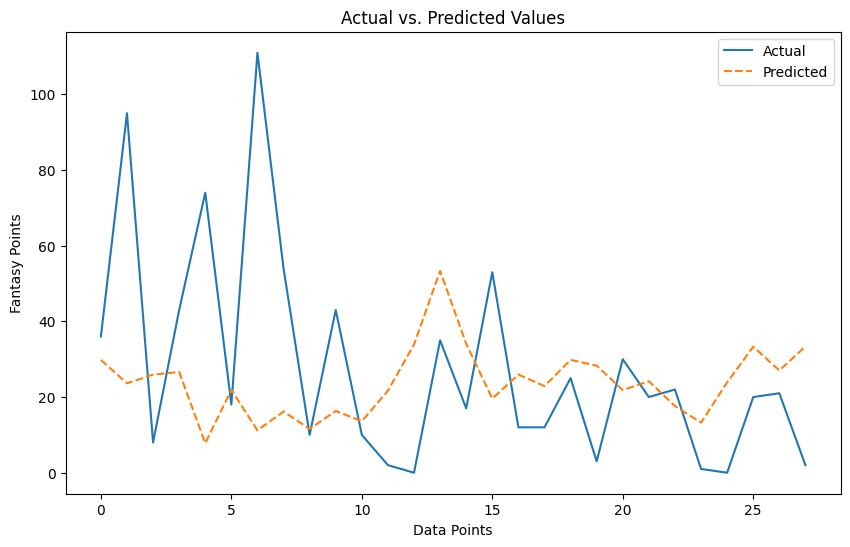

In [25]:
import matplotlib.pyplot as plt
#Plotting actual vs. predicted values for the test data
plt.figure(figsize=(10, 6))
plt.plot(y_test[10:], label='Actual')
plt.plot(test_predictions, label='Predicted', linestyle='--')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Data Points')
plt.ylabel('Fantasy Points')
plt.legend()
plt.show()

In [26]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

#Selecting relevant columns
features = ['runs_off_bat', 'ball', 'boundary_count', 'sixer_count', 'strike_rate', 'half_century_count', 'century_count', 'innings']
target = 'fantasy_points'

X = dhoni_batting_stats[features].values
y = dhoni_batting_stats[target].values

#Calculating the index for splitting the data
split_index = int(0.8 * len(y))  # 80% for training, 20% for testing

#Splitting data into train and test sets based on the index
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

#Creating empty lists to store sequences and targets with window size 10
x_windows_train = []
y_windows_train = []

#Creating rolling window sequences for training data with window size 10
for i in range(10, len(y_train)):
    x_train = X_train[i-10:i, :]  #Creating input sequences of length 10
    y_train_val = y_train[i]      #Corresponding target for the sequence
    x_windows_train.append(x_train)
    y_windows_train.append(y_train_val)

#Converting lists to numpy arrays for training data
x_windows_train = np.array(x_windows_train)
y_windows_train = np.array(y_windows_train)

#Reshaping input data to fit the CNN input shape for training data
x_windows_train = x_windows_train.reshape((x_windows_train.shape[0], x_windows_train.shape[1], x_windows_train.shape[2]))

#Creating the CNN model with Dropout regularization
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(x_windows_train.shape[1], x_windows_train.shape[2])))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))  # Output layer with one neuron for regression

model.compile(optimizer='adam', loss='mse')  # Compiling the model

#Training the model
model.fit(x_windows_train, y_windows_train, epochs=50, batch_size=32, verbose=1)

#Evaluating the model on training data
train_predictions = model.predict(x_windows_train)
train_r_squared = r2_score(y_train[10:], train_predictions)
train_mae = mean_absolute_error(y_train[10:], train_predictions)
train_rmse = np.sqrt(mean_squared_error(y_train[10:], train_predictions))

print("Training Metrics:")
print(f"Mean Absolute Error: {train_mae}")
print(f"Root Mean Squared Error: {train_rmse}")

#Creating empty lists to store sequences for testing data with window size 10
x_windows_test = []

#Creating rolling window sequences for testing data with window size 10
for i in range(10, len(y_test)):
    x_test = X_test[i-10:i, :]  # Creating input sequences of length 10 for testing data
    x_windows_test.append(x_test)

#Convert list to numpy array for testing data
x_windows_test = np.array(x_windows_test)

#Reshaping input data to fit the CNN input shape for testing data
x_windows_test = x_windows_test.reshape((x_windows_test.shape[0], x_windows_test.shape[1], x_windows_test.shape[2])) 

#Predictions on testing data
test_predictions = model.predict(x_windows_test)

#Evaluating the model on testing data
test_r_squared = r2_score(y_test[10:], test_predictions)
test_mae = mean_absolute_error(y_test[10:], test_predictions)
test_rmse = np.sqrt(mean_squared_error(y_test[10:], test_predictions))

print("\nTesting Metrics:")
print(f"Mean Absolute Error: {test_mae}")
print(f"Root Mean Squared Error: {test_rmse}")

Epoch 1/50
5/5 [==============================] - 2s 4ms/step - loss: 2358.0891
Epoch 2/50
5/5 [==============================] - 0s 4ms/step - loss: 924.8567
Epoch 3/50
5/5 [==============================] - 0s 4ms/step - loss: 1099.3525
Epoch 4/50
5/5 [==============================] - 0s 5ms/step - loss: 728.0846
Epoch 5/50
5/5 [==============================] - 0s 5ms/step - loss: 674.4119
Epoch 6/50
5/5 [==============================] - 0s 4ms/step - loss: 797.4056
Epoch 7/50
5/5 [==============================] - 0s 4ms/step - loss: 679.9851
Epoch 8/50
5/5 [==============================] - 0s 4ms/step - loss: 689.8516
Epoch 9/50
5/5 [==============================] - 0s 4ms/step - loss: 680.7619
Epoch 10/50
5/5 [==============================] - 0s 4ms/step - loss: 625.1135
Epoch 11/50
5/5 [==============================] - 0s 7ms/step - loss: 611.4330
Epoch 12/50
5/5 [==============================] - 0s 7ms/step - loss: 648.8363
Epoch 13/50
5/5 [==============================

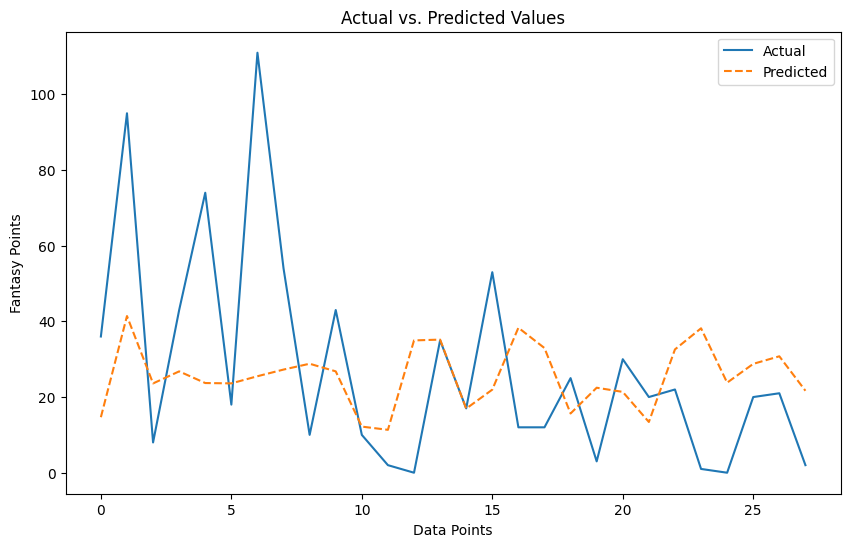

In [27]:
import matplotlib.pyplot as plt
#Plotting actual vs. predicted values for the test data
plt.figure(figsize=(10, 6))
plt.plot(y_test[10:], label='Actual')
plt.plot(test_predictions, label='Predicted', linestyle='--')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Data Points')
plt.ylabel('Fantasy Points')
plt.legend()
plt.show()

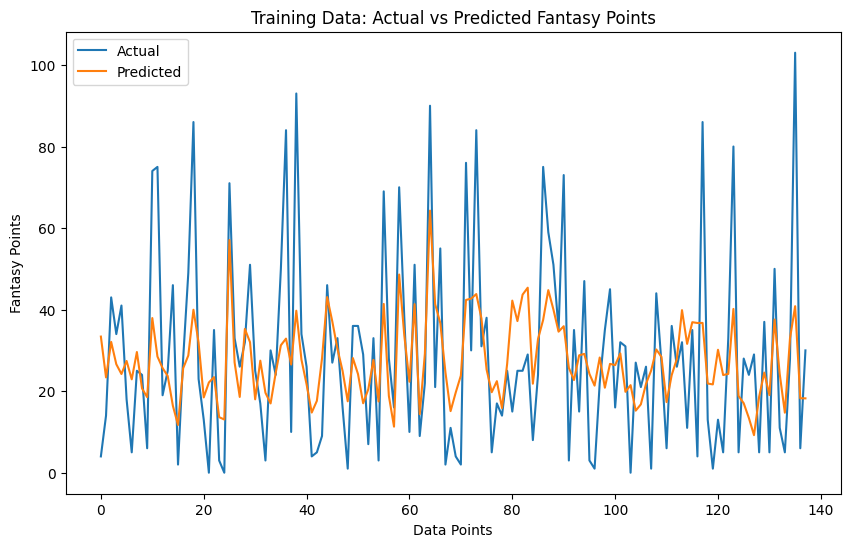

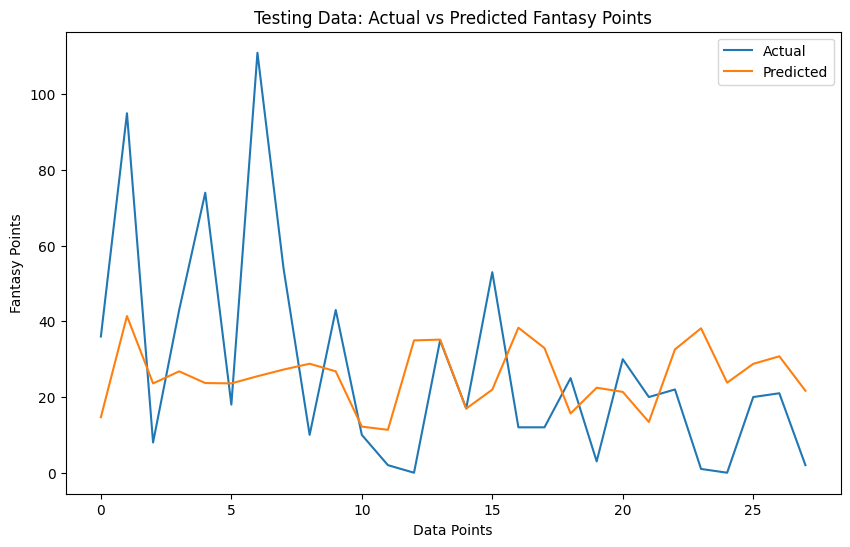

In [28]:
import matplotlib.pyplot as plt

# Plotting training predictions vs actual values
plt.figure(figsize=(10, 6))
plt.plot(y_train[10:], label='Actual')
plt.plot(train_predictions, label='Predicted')
plt.title('Training Data: Actual vs Predicted Fantasy Points')
plt.xlabel('Data Points')
plt.ylabel('Fantasy Points')
plt.legend()
plt.show()

# Plotting testing predictions vs actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test[10:], label='Actual')
plt.plot(test_predictions, label='Predicted')
plt.title('Testing Data: Actual vs Predicted Fantasy Points')
plt.xlabel('Data Points')
plt.ylabel('Fantasy Points')
plt.legend()
plt.show()

In [29]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

#Assuming your data is loaded into 'kohli_batting_stats'

#Selecting relevant columns
features = ['runs_off_bat', 'ball', 'boundary_count', 'sixer_count', 'strike_rate', 'half_century_count', 'century_count', 'innings']
target = 'fantasy_points'

X = dhoni_batting_stats[features].values
y = dhoni_batting_stats[target].values

#Calculate the index for splitting the data
split_index = int(0.8 * len(y))  # 80% for training, 20% for testing

#Splitting data into train and test sets based on the index
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

#Creating empty lists to store sequences and targets with window size 10
x_windows_train = []
y_windows_train = []

#Creating rolling window sequences for training data with window size 10
for i in range(10, len(y_train)):
    x_train = X_train[i-10:i, :]  # Creating input sequences of length 10
    y_train_val = y_train[i]      # Corresponding target for the sequence
    x_windows_train.append(x_train)
    y_windows_train.append(y_train_val)

#Convert lists to numpy arrays for training data
x_windows_train = np.array(x_windows_train)
y_windows_train = np.array(y_windows_train)

#Reshaping input data to fit the RNN input shape for training data
x_windows_train = x_windows_train.reshape((x_windows_train.shape[0], x_windows_train.shape[1], x_windows_train.shape[2]))

#Creating the GRU model
model = Sequential()
model.add(GRU(50, activation='relu', input_shape=(x_windows_train.shape[1], x_windows_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))  # Output layer with one neuron for regression

model.compile(optimizer='adam', loss='mse')  # Compiling the model

#Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

#Training the model with early stopping
model.fit(x_windows_train, y_windows_train, epochs=50, batch_size=32, verbose=1, validation_split=0.2, callbacks=[early_stopping])

#Evaluating the model on training data
train_predictions = model.predict(x_windows_train)
train_r_squared = r2_score(y_train[10:], train_predictions)
train_mae = mean_absolute_error(y_train[10:], train_predictions)
train_rmse = np.sqrt(mean_squared_error(y_train[10:], train_predictions))

print("Training Metrics:")
print(f"Mean Absolute Error: {train_mae}")
print(f"Root Mean Squared Error: {train_rmse}")

#Creating rolling window sequences for testing data with window size 10
x_windows_test = []
for i in range(10, len(y_test)):
    x_test = X_test[i-10:i, :]  # Creating input sequences of length 10 for testing data
    x_windows_test.append(x_test)

#Convert list to numpy array for testing data
x_windows_test = np.array(x_windows_test)

#Reshaping input data to fit the RNN input shape for testing data
x_windows_test = x_windows_test.reshape((x_windows_test.shape[0], x_windows_test.shape[1], x_windows_test.shape[2])) 

#Predictions on testing data
test_predictions = model.predict(x_windows_test)

#Evaluating the model on testing data
test_r_squared = r2_score(y_test[10:], test_predictions)
test_mae = mean_absolute_error(y_test[10:], test_predictions)
test_rmse = np.sqrt(mean_squared_error(y_test[10:], test_predictions))

print("\nTesting Metrics:")
print(f"Mean Absolute Error: {test_mae}")
print(f"Root Mean Squared Error: {test_rmse}")

Epoch 1/50
4/4 [==============================] - 4s 198ms/step - loss: 2913.6799 - val_loss: 2190.8213
Epoch 2/50
4/4 [==============================] - 0s 27ms/step - loss: 2185.8652 - val_loss: 1832.6150
Epoch 3/50
4/4 [==============================] - 0s 27ms/step - loss: 1932.0045 - val_loss: 1557.6809
Epoch 4/50
4/4 [==============================] - 0s 30ms/step - loss: 1592.5607 - val_loss: 1326.9589
Epoch 5/50
4/4 [==============================] - 0s 32ms/step - loss: 1357.4802 - val_loss: 1103.5396
Epoch 6/50
4/4 [==============================] - 0s 31ms/step - loss: 1103.3223 - val_loss: 913.9152
Epoch 7/50
4/4 [==============================] - 0s 28ms/step - loss: 823.4333 - val_loss: 778.3695
Epoch 8/50
4/4 [==============================] - 0s 29ms/step - loss: 676.8583 - val_loss: 805.6136
Epoch 9/50
4/4 [==============================] - 0s 29ms/step - loss: 806.7831 - val_loss: 813.8670
Epoch 10/50
4/4 [==============================] - 0s 30ms/step - loss: 635.803